# 5-12. 프로젝트 1: 당뇨병 수치를 맞춰보자

scikit-learn이 제공하는 'diabetes' 데이터를 가지고 회귀분석을 해봤다. 주어진 데이터를 **학습 데이터 0.8, 테스트 데이터 0.2** 비율로 분리했다. 학습에는 경사하강법을 활용했다. 현 시점의 기울기를 구하고, 양수라면 w를 줄이고 음수라면 w를 키우는 방식이다. 이번 학습에서는 iteration을 **3000회** 반복했다. 손실함수는 에러 제곱의 평균인 **MSE(mean squared error)** 를 사용했다. **학습률(learning rate)은 0.01** 로 설정했다. 여러 학습률을 넣어 시행했더니, 값을 높일수록 MSE가 줄어드는 경향을 보였다. 테스트 데이터를 대상으로 모델을 적용했고, 최종 MSE 값은 **2881.0696729573738** 가 도출됐다.

## 필요한 모듈 import

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## (1) 데이터 가져오기

In [2]:
diabetes = load_diabetes()

# print(diabetes)
# 'feature_names': ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

df_X = diabetes['data']
df_y = diabetes['target']

## (2)~(3) 모델에 입력할 데이터 준비하기

In [3]:
df_X = np.array(df_X)
df_y = np.array(df_y)

## (4) train 데이터와 test 데이터로 분리하기

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## (5) 모델 준비하기

In [5]:
# 입력 데이터 수: 10개 
# 'feature_names': ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

W = np.random.rand(10)
b = np.random.rand()

# print("W:", W, "\nb:", b)

# 모델 함수
def model(X, W, b):
    predictions = 0
    
    for i in range(10):
        predictions += X[:, i] * W[i] # xi * wi
    
    predictions += b # (xi * wi) + b
    return predictions

## (6) 손실함수 loss 정의하기

In [6]:
# MSE: 제곱의 평균
def MSE(a, b):
    return ((a - b) ** 2).mean()

# RMSE: MSE의 제곱근
def RMSE(a, b):
    return MSE(a, b) ** 0.5

# 손실함수 loss()
def loss(x, w, b, y):
    predictions = model(x, w, b)
    # return RMSE(predictions, y)
    return MSE(predictions, y)

## (7) 기울기를 구하는 gradient 함수 구현하기

In [7]:
def gradient(X, W, b, y):
    N = len(W) # 가중치의 수 (이 예제에서는 10개)
    y_pred = model(X, W, b) # 모델에 데이터 넣어 예측값 도출
    
    dW = 1/N * 2 * X.T.dot(y_pred - y) # W의 gradient
    db = 2 * (y_pred - y).mean() # b의 gradient
    
    return dW, db

## (8) 하이퍼파라미터인 learning rate 설정하기

In [8]:
LEARNING_RATE = 0.01

## (9) 모델 학습하기

In [9]:
losses = []

for i in range(1, 3001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    
    if i % 100 == 0: # 100번당 1번씩 결과 출력
        print('Iteration %d: Loss %0.4f' % (i, L))

Iteration 100: Loss 4689.8713
Iteration 200: Loss 3675.7842
Iteration 300: Loss 3389.8001
Iteration 400: Loss 3234.4248
Iteration 500: Loss 3136.3161
Iteration 600: Loss 3069.9566
Iteration 700: Loss 3023.5297
Iteration 800: Loss 2990.4669
Iteration 900: Loss 2966.6597
Iteration 1000: Loss 2949.3715
Iteration 1100: Loss 2936.7218
Iteration 1200: Loss 2927.3978
Iteration 1300: Loss 2920.4736
Iteration 1400: Loss 2915.2920
Iteration 1500: Loss 2911.3838
Iteration 1600: Loss 2908.4117
Iteration 1700: Loss 2906.1322
Iteration 1800: Loss 2904.3682
Iteration 1900: Loss 2902.9907
Iteration 2000: Loss 2901.9045
Iteration 2100: Loss 2901.0393
Iteration 2200: Loss 2900.3430
Iteration 2300: Loss 2899.7765
Iteration 2400: Loss 2899.3102
Iteration 2500: Loss 2898.9219
Iteration 2600: Loss 2898.5947
Iteration 2700: Loss 2898.3154
Iteration 2800: Loss 2898.0741
Iteration 2900: Loss 2897.8630
Iteration 3000: Loss 2897.6759


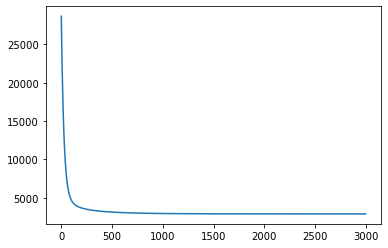

In [10]:
plt.plot(losses)
plt.show()

In [11]:
W, b

(array([  40.26943232, -237.64871378,  551.78782947,  340.59284919,
        -100.4055748 , -126.14735527, -214.94234318,  149.5970893 ,
         413.06237587,   69.52857906]),
 151.3028389200708)

## (10) test 데이터에 대한 성능 확인하기

In [12]:
y_pred = model(X_test, W, b)
l = loss(X_test, W, b, y_test)
l

2881.0696729573738

## (11) 정답 데이터와 예측한 데이터 시각화하기

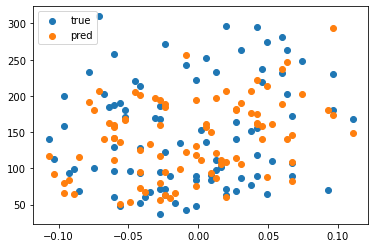

In [13]:
plt.scatter(X_test[:, 0], y_test, label='true')
plt.scatter(X_test[:, 0], y_pred, label='pred')
plt.legend()
plt.show()

# 5-13. 프로젝트 2: 자전거 타는 사람은 몇 명?

Kaggle에서 제공하는 bike-sharing-demand 데이터를 활용해 linear regression을 해봤다. 총 10886행의 학습 데이터에서 datetime 열을 datetime 타입으로 변환하고, year, month, day, hour, minute, second를 각각 추출해 6개 열을 추가했다. 이후 주어진 데이터를 **학습 데이터 0.8, 테스트 데이터 0.2** 비율로 분리했다.   

X에 어떤 열을 포함하냐에 따라 RMSE 값이 달라졌다. 여러 조합을 반복한 결과 최종적으로는 temp, humidity, year, month, day, hour, minute, second 8가지 열을 선택했다. y는 count로 설정해 linear regression을 시행한 후, **MSE는 19980.737029904332, RMSE는 141.35323494672605** 가 나와 실습을 마무리했다.

## (1) 데이터 가져오기

In [14]:
train = pd.read_csv('bike-sharing-demand/train.csv')
print(train)

                  datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000 

## 연, 월, 일, 시, 분, 초 6개 컬럼 생성하기

In [15]:
train['datetime'] = pd.to_datetime(train['datetime'])
# print(train['datetime'][0].year)

# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
train['minute'] = pd.DatetimeIndex(train['datetime']).minute
train['second'] = pd.DatetimeIndex(train['datetime']).second

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

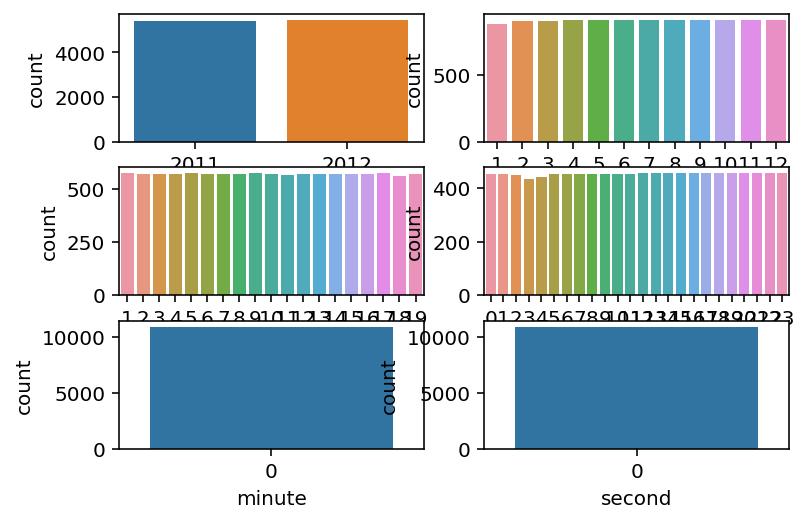

In [16]:
%config InlineBackend.figure_format = 'retina'
fig, ax = plt.subplots(nrows=3, ncols=2) # https://stackoverflow.com/questions/43131274/how-do-i-plot-two-countplot-graphs-side-by-side-in-seaborn

sns.countplot(x='year', data=train, ax=ax[0][0])
sns.countplot(x='month', data=train, ax=ax[0][1])
sns.countplot(x='day', data=train, ax=ax[1][0])
sns.countplot(x='hour', data=train, ax=ax[1][1])
sns.countplot(x='minute', data=train, ax=ax[2][0])
sns.countplot(x='second', data=train, ax=ax[2][1])

plt.show()

## (4) x, y 컬럼 선택 및 train_test 데이터 분리

In [17]:
X = train[['temp', 'humidity', 'year', 'month', 'day', 'hour', 'minute', 'second']].values
y = train['count'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## (5) LinearRegression 모델 학습

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## (6) X_test에 대한 예측값 출력 및 손실함수값 계산

In [19]:
y_pred = model.predict(X_test)
print('y_pred:', str(y_pred))

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False) # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

print('MSE:', str(mse), '/ RMSE:', str(rmse))

y_pred: [244.81960313  59.3905298  204.86715478 ... 305.95473856  38.37647599
 248.51416615]
MSE: 19980.737029904332 / RMSE: 141.35323494672605


## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

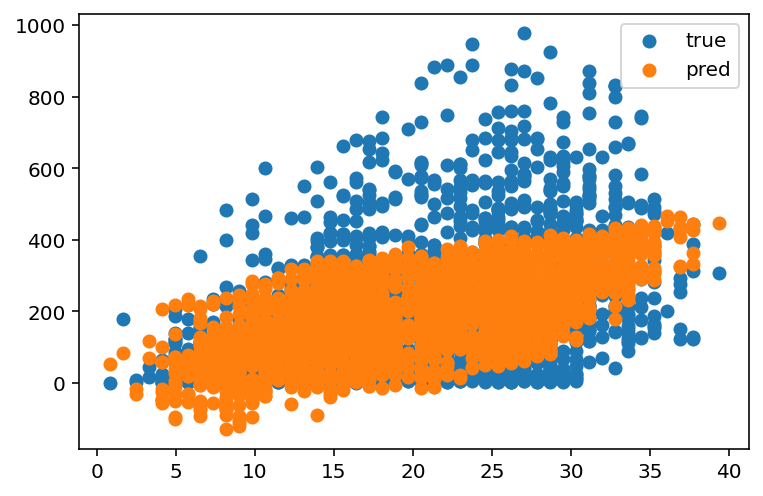

In [20]:
# temp
plt.scatter(X_test[:, 0], y_test, label='true')
plt.scatter(X_test[:, 0], y_pred, label='pred')
plt.legend()
plt.show()

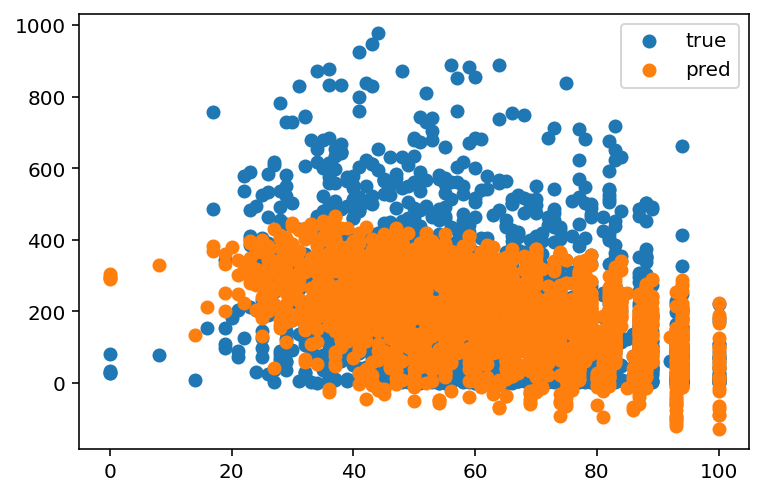

In [21]:
# humidity
plt.scatter(X_test[:, 1], y_test, label='true')
plt.scatter(X_test[:, 1], y_pred, label='pred')
plt.legend()
plt.show()